In [71]:
#!pip install scikit-commpy
#!pip install ipywidgets

In [72]:
#!pip install numpy


In [73]:
#!pip install matplotlib

In [74]:
!pip install PyQt5
!pwd

/home/incredible/Projects/python/signal_processing


In [75]:
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
from PyQt5.QtCore import Qt


In [76]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
from commpy.filters import rcosfilter
from ipywidgets import interact, widgets

In [77]:
from scipy.signal import butter, filtfilt
import os
from array import array
def read_signal(file_name, data_type):
    file_stats = os.stat(file_name)
    file_size = file_stats.st_size
    iq_size_in_bytes = 4
    number_of_int_to_read = file_size // iq_size_in_bytes * 2
    arr = array(data_type)
    with open(file_path, 'rb') as fileobj:
        arr.fromfile(fileobj, number_of_int_to_read)
    i = np.array(arr[:: 2])
    i = i.reshape((len(i), 1))
    q = np.array(arr[1:: 2])
    q = q.reshape((len(q), 1))
    sig = np.empty((len(i), 1), complex)
    sig.real = i
    sig.imag = q
    sig_flatten = sig.flatten()
    return sig_flatten


def find_carr_freq(spectrum, min_sig_lvl):
    idx = list(np.where(spectrum >= min_sig_lvl))
    idx = idx[0]
    f_low = idx[0]
    f_high = idx[-1]
    carr_freq = round((f_low + f_high) / 2)
    return carr_freq


def mixing_signal(signal, freq):
    N = len(signal)
    k = freq
    n = np.arange(0, N, 1)
    mixer = np.exp(-1j * 2 * math.pi * k * n / N)
    mixed_signal = np.multiply(signal, mixer)
    return mixed_signal


def filter_signal(mixed_sig, normal_cutoff):
    order = 2
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    sig_filtered = filtfilt(b, a, mixed_sig)
    return sig_filtered

In [78]:
def resampling_lagrange_step_ver(s, step, x0):
    """
    % y = resample_lagrange(s, p, q, x0)
    % Digital resampling by polynomial Lagrange interpolation.
    % Function changes input signal s samplerate to p/q times and adds fractional
    % delay.
    %
    % Input parameters
    %  s   - input signal vector [N x 1];
    %  p   - p paramter of samplarate conversion
    %  q   - q paramter of samplarate conversion
    %  x0  - fractional delay
    %
    % Ouptut parameters
    %  y   - Resampled signal
    %
    % Author: Sergey Bakhurin (dsplib.org)
    """
    #if (p > 1):
    #    if (q == 1):
    #        y = np.zeros(int(float((len(s) - 1) * p) / float(q)) + 1, dtype=np.csingle)
    #    else:
    #        y = np.zeros(int(float(len(s) * p) / float(q)), dtype=np.csingle)
    #else:
    #    y = np.zeros(int(float(len(s) * p) / float(q)), dtype=np.csingle)
    if (step > 1):
        y = np.zeros(int((len(s) -1) / step) + 1, dtype=np.csingle)
    else:
        y = np.zeros(int(len(s) / step), dtype=np.csingle) 
    
    t = np.zeros(len(y))
    s = np.concatenate((np.array([0., 0.]), s, np.array([0., 0.])))

    print(f"len(y) = {len(y)}, len(t) = {len(t)}, len(s) = {len(s)}")

    for k in range(len(y)):
        #x = k * q / p - x0
        x = k * step - x0
        t[k] = x
        n = int(np.floor(x)) + 4
        d = np.floor(x) + 1 - x
        #print(f"x = {x}, n = {n}, d = {d}")
        a0 = s[n - 1]
        a3 = 1 / 6 * (s[n] - s[n - 3]) + 0.5 * (s[n - 2] - s[n - 1])
        a1 = 0.5 * (s[n] - s[n - 2]) - a3
        a2 = s[n] - s[n - 1] - a3 - a1
        #print(f"a0 = {a0} a1 = {a1} a2 = {a2} a3 = {a3}")
        y[k] = a0 - a1 * d + a2 * d ** 2 - a3 * d ** 3

    #print(t)
    return y

In [79]:
n = np.arange(0, 20)
n[5] = 32767 
n[6] = 32767
n[7] = 32767
n[8] = 32767
n[9] =-32767
print(n)
s = resampling_lagrange_step_ver(n, 1.1, 0.9)
print(s)

[     0      1      2      3      4  32767  32767  32767  32767 -32767
     10     11     12     13     14     15     16     17     18     19]
len(y) = 18, len(t) = 18, len(s) = 24
[-1.6500000e-02+0.j  1.5200000e-01+0.j  1.3000000e+00+0.j
  2.4000001e+00+0.j -2.0441250e+03+0.j  1.9923961e+04+0.j
  3.4257715e+04+0.j  3.2767000e+04+0.j  3.4634719e+04+0.j
 -3.2767000e+04+0.j  9.4421600e+02+0.j  1.1200000e+01+0.j
  1.2300000e+01+0.j  1.3400000e+01+0.j  1.4500000e+01+0.j
  1.5600000e+01+0.j  1.6700001e+01+0.j  1.7799999e+01+0.j]


In [80]:
n = np.arange(0, 200, 1)
resampling_lagrange_step_ver(n, 3.2, 0.1)

len(y) = 63, len(t) = 63, len(s) = 204


array([-2.850e-02+0.j,  3.100e+00+0.j,  6.300e+00+0.j,  9.500e+00+0.j,
        1.270e+01+0.j,  1.590e+01+0.j,  1.910e+01+0.j,  2.230e+01+0.j,
        2.550e+01+0.j,  2.870e+01+0.j,  3.190e+01+0.j,  3.510e+01+0.j,
        3.830e+01+0.j,  4.150e+01+0.j,  4.470e+01+0.j,  4.790e+01+0.j,
        5.110e+01+0.j,  5.430e+01+0.j,  5.750e+01+0.j,  6.070e+01+0.j,
        6.390e+01+0.j,  6.710e+01+0.j,  7.030e+01+0.j,  7.350e+01+0.j,
        7.670e+01+0.j,  7.990e+01+0.j,  8.310e+01+0.j,  8.630e+01+0.j,
        8.950e+01+0.j,  9.270e+01+0.j,  9.590e+01+0.j,  9.910e+01+0.j,
        1.023e+02+0.j,  1.055e+02+0.j,  1.087e+02+0.j,  1.119e+02+0.j,
        1.151e+02+0.j,  1.183e+02+0.j,  1.215e+02+0.j,  1.247e+02+0.j,
        1.279e+02+0.j,  1.311e+02+0.j,  1.343e+02+0.j,  1.375e+02+0.j,
        1.407e+02+0.j,  1.439e+02+0.j,  1.471e+02+0.j,  1.503e+02+0.j,
        1.535e+02+0.j,  1.567e+02+0.j,  1.599e+02+0.j,  1.631e+02+0.j,
        1.663e+02+0.j,  1.695e+02+0.j,  1.727e+02+0.j,  1.759e+02+0.j,
      

In [81]:
def resampling_lagrange(s, p, q, x0):
    """
    % y = resample_lagrange(s, p, q, x0)
    % Digital resampling by polynomial Lagrange interpolation.
    % Function changes input signal s samplerate to p/q times and adds fractional
    % delay.
    %
    % Input parameters
    %  s   - input signal vector [N x 1];
    %  p   - p paramter of samplarate conversion
    %  q   - q paramter of samplarate conversion
    %  x0  - fractional delay
    %
    % Ouptut parameters
    %  y   - Resampled signal
    %
    % Author: Sergey Bakhurin (dsplib.org)
    """
    if (p > 1):
        if (q == 1):
            y = np.zeros(int(float((len(s) - 1) * p) / float(q)) + 1, dtype=np.csingle)
        else:
            y = np.zeros(int(float(len(s) * p) / float(q)), dtype=np.csingle)
    else:
        y = np.zeros(int(float(len(s) * p) / float(q)), dtype=np.csingle)

    t = np.zeros(len(y))
    s = np.concatenate((np.array([0., 0.]), s, np.array([0., 0.])))

    for k in range(len(y)):
        x = k * q / p - x0
        t[k] = x
        n = int(np.floor(x)) + 4
        d = np.floor(x) + 1 - x
        a0 = s[n - 1]
        a3 = 1 / 6 * (s[n] - s[n - 3]) + 0.5 * (s[n - 2] - s[n - 1])
        a1 = 0.5 * (s[n] - s[n - 2]) - a3
        a2 = s[n] - s[n - 1] - a3 - a1

        y[k] = a0 - a1 * d + a2 * d ** 2 - a3 * d ** 3

    return y


In [82]:
def calculate_spectrum(signal):
    yf = np.fft.fft(signal)
    yf = np.abs(yf.reshape((len(yf), 1))) / len(signal)
    return yf


def plot_spectrum(signal, figure_counter, title="Amplitude spectrum"):
    spectrum = np.roll(calculate_spectrum(signal), len(signal) // 2)
    yf = 20 * np.log10(spectrum)
    plt.figure(figure_counter)
    x_data = np.arange(-len(spectrum) // 2 + 1, len(spectrum) // 2 + 1)
    x_data = x_data / (len(spectrum) / 2)
    plt.plot(x_data, yf)
    plt.grid(1)
    plt.xlabel('Frequency (semicircles)')
    plt.ylabel('Magnitude (dB)')
    plt.title(title)
    return yf

In [83]:
def gen_rcfilter_impulse_response(n, fs):
    s_psf = rcosfilter(n * fs, alpha=0.24, Ts=1, Fs=fs)[1][1:]
    print(s_psf)
    plt.figure()
    plt.plot(s_psf, '*-')
    plt.grid()
    plt.title('RC filter impulse response')
    plt.show()
    return s_psf

In [84]:
def add_freq(sig, f0_to_fsig):
    n = np.arange(0, len(sig), 1)
    j_exp = np.exp(1j * np.pi * f0_to_fsig * n)
    print("complex exp")
    print(j_exp[0 : 20])
    mixer = np.exp(1j * np.pi * f0_to_fsig * n)
    return sig * mixer

In [85]:
def add_phase(sig, phase):
# phase = [-1, 1] [semicircles]
    sig *= np.exp(1j * np.pi * phase)
    return sig

In [86]:
def gen_qpsk_symbols(n_symb, fs):
    # create IQ of QPSK
    # complex array: [(1 + 1j, 1 -1j, ..., -1 -1j)]
    data = np.random.randint(0, 4, n_symb)
    #x_tr = x.transpose()
    y = [-1 - 1j, -1 + 1j, 1 - 1j, 1 + 1j]
    iq = [y[val] for val in data]
    iq_ups = np.zeros(N * fs, dtype=complex)
    iq_ups[:len(iq) * fs:fs] = iq
    return iq_ups

[ 4.24996460e-06  7.80681981e-06  1.00473518e-05  1.06096386e-05
  9.46490890e-06  6.91708197e-06  3.53015446e-06 -1.42863282e-19
 -3.00015110e-06 -4.96525263e-06 -5.66180926e-06 -5.16569850e-06
 -3.82639780e-06 -2.16685201e-06 -7.43433574e-07  4.61964924e-21
 -1.51629103e-07 -1.12674664e-06 -2.58256731e-06 -3.99121783e-06
 -4.77670319e-06 -4.47010141e-06 -2.84513962e-06 -4.16635826e-20
  3.63686506e-06  7.38161233e-06  1.04361963e-05  1.20652840e-05
  1.17688807e-05  9.41035207e-06  5.26863180e-06 -1.79753096e-19
 -5.48480673e-06 -1.02028862e-05 -1.33015042e-05 -1.42357985e-05
 -1.28820258e-05 -9.56057570e-06 -4.96312666e-06  2.40699928e-20
  4.39801342e-06  7.47858044e-06  8.82247665e-06  8.41908649e-06
  6.64619334e-06  4.15978944e-06  1.72072998e-06 -5.96968215e-20
 -5.90424284e-07  7.73447676e-20  1.45009430e-06  3.15227033e-06
  4.37379020e-06  4.45551562e-06  2.99972529e-06 -8.23022442e-20
 -4.12112841e-06 -8.57986133e-06 -1.23923623e-05 -1.45949744e-05
 -1.44736440e-05 -1.17488

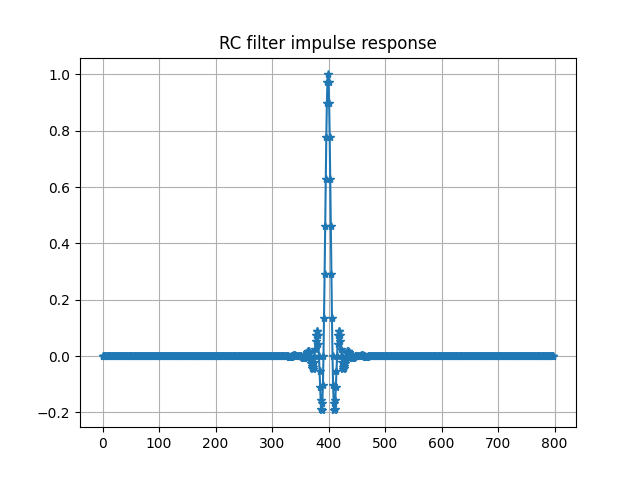

len(y) = 888, len(t) = 888, len(s) = 804
complex exp
[ 1.00000000e+00+0.00000000e+00j  5.55570233e-01+8.31469612e-01j
 -3.82683432e-01+9.23879533e-01j -9.80785280e-01+1.95090322e-01j
 -7.07106781e-01-7.07106781e-01j  1.95090322e-01-9.80785280e-01j
  9.23879533e-01-3.82683432e-01j  8.31469612e-01+5.55570233e-01j
  3.06161700e-16+1.00000000e+00j -8.31469612e-01+5.55570233e-01j
 -9.23879533e-01-3.82683432e-01j -1.95090322e-01-9.80785280e-01j
  7.07106781e-01-7.07106781e-01j  9.80785280e-01+1.95090322e-01j
  3.82683432e-01+9.23879533e-01j -5.55570233e-01+8.31469612e-01j
 -1.00000000e+00+6.12323400e-16j -5.55570233e-01-8.31469612e-01j
  3.82683432e-01-9.23879533e-01j  9.80785280e-01-1.95090322e-01j]


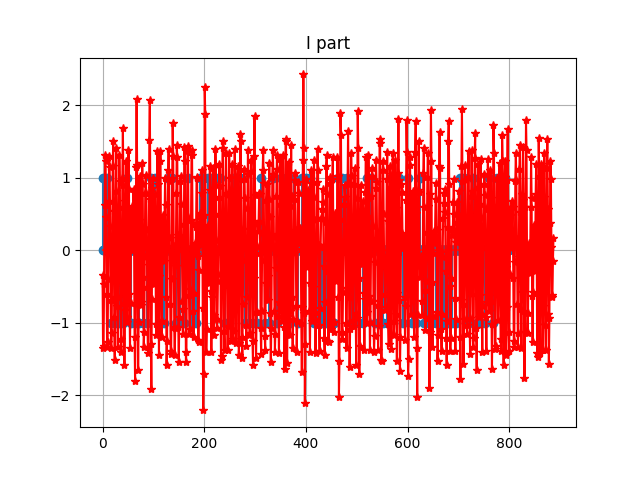

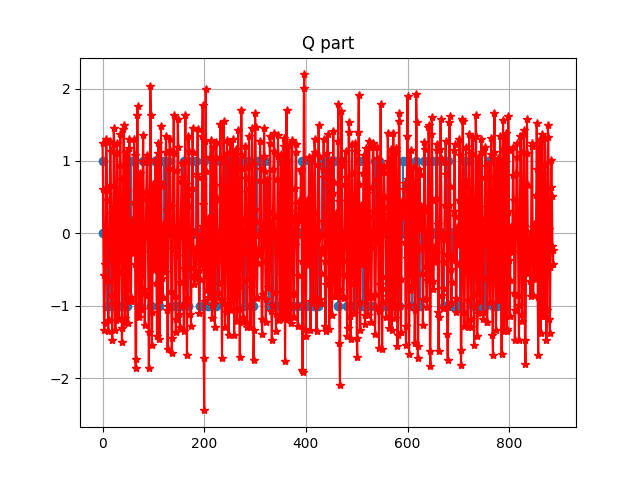

In [87]:
N = 100
Fs = 8 # f_sampling / f_symbol (SPS)
f0 = 2.5 # f_carrier / f_symbol
phase_0 = 3 / 9 # semicircles
delay = 0.1

s_rc = gen_rcfilter_impulse_response(N, Fs)
s_qpsk = gen_qpsk_symbols(N, Fs)
qpsk_filtered = np.convolve(s_qpsk, s_rc, 'same')
# ----- Add delay -----
p = 1
q = 1
x0 = delay # it is negative delay
global s_rc_re_delay 
#lobal qpsk_filtered
qpsk_filtered = resampling_lagrange_step_ver(qpsk_filtered, 0.9, 0.1)
#qpsk_filtered = resampling_lagrange(qpsk_filtered, p, q, x0) # qpsk_filt_del

# ----- Add Carrier and initial phase -----
qpsk_filtered = add_phase(qpsk_filtered, phase_0)
qpsk_filtered = add_freq(qpsk_filtered, f0 / Fs)

import ipympl
%matplotlib inline
%matplotlib widget
plt.figure()
plt.stem(s_qpsk.real)
plt.plot(qpsk_filtered.real, 'r*-')
plt.grid()
plt.title('I part')
plt.show()


plt.figure()
plt.stem(s_qpsk.imag)
plt.plot(qpsk_filtered.imag, 'r*-')
plt.grid()
plt.title('Q part')
plt.show()

#s_rc_conv = np.convolve(s_qpsk_with_carr, s_rc, 'same')


In [88]:
def plot_iq( delay: float, fsymb_to_fsampl: float, phase: float, f0: float):
    print(f"fract omega = {f0}, fsymb_to_fsampl = {fsymb_to_fsampl}, phase = {phase}")
    matplotlib.pyplot.close()

    signal_iq = qpsk_filtered
    
    mixed_sig = add_freq(signal_iq, f0)
    sig_default = add_phase(mixed_sig, phase)

    p = 1
    q = round(fsymb_to_fsampl) #todo -> remove round()
    x0 = delay
    print(f"p = {p}, q = {q}, x = {x0}")
    res_sig = resampling_lagrange_step_ver(sig_default, fsymb_to_fsampl, x0)
    #res_sig = resampling_lagrange(sig_default, p, q, x0)
    plt.close()
    plt.figure()
    plt.plot(res_sig.real, res_sig.imag, '.')
    plt.grid()
    plt.show()

In [89]:
delay_float = widgets.BoundedFloatText(
    value=0,
    min=-1,
    max=1,
    step=0.0001,
    description='Delay before first symbol, samples:',
    disabled=False
)

sps = widgets.BoundedFloatText(
    value=1.0,
    min=1,
    max=50,
    step=0.00001,
    description='SPS',
    disabled=False
)

phase_float = widgets.BoundedFloatText(
    value=.0,
    min=-1,
    max=1,
    step=0.0001,
    description='Phase, [-1, 1], semicircles',
    disabled=False
)

f0_float = widgets.BoundedFloatText(
    value=.0,
    min = -1,
    max = 1,
    step = 0.0001,
    description = 'f0, [0, 1], circles',
    disabled = False
)
#print(qpsk_filtered)

# Use the interact function to connect the slider to the plot function
interact(plot_iq, delay=delay_float, fsymb_to_fsampl=sps, phase = phase_float, f0 = f0_float)

interactive(children=(BoundedFloatText(value=0.0, description='Delay before first symbol, samples:', max=1.0, …

<function __main__.plot_iq(delay: float, fsymb_to_fsampl: float, phase: float, f0: float)>

In [90]:
# Check samples.pcm
import numpy as np
import struct
import os
def read_by_unpack(file_name, data_num=0, data_type="int16"):
    # Load test data (int16, float32
    
    f = open(file_name,'rb')
    file_stats = os.stat(file_name)
    file_size = file_stats.st_size
    print(file_size)
    sizeof_data = 0
    struct_type = ''
    if data_type == "int16":
        sizeof_data = 2
        struct_type = 'h'
    if data_type == "float32":
        sizeof_data = 4
        struct_type = 'f'
    
    if data_num == 0:
        data_num = int(file_size / sizeof_data);
    
    #  102500 is the number of numbers contained in the document, and a floating point number occupies 4 bytes
    arr = f.read(data_num * sizeof_data)
    print(data_num)
    data_raw = struct.unpack(struct_type * data_num, arr)
    f.close()
    return data_raw

def read_signal(file_name, data_type, int_num_to_read = 0):
    file_stats = os.stat(file_name)
    file_size = file_stats.st_size
    iq_size_in_bytes = 0
    if data_type == 'h':
        iq_size_in_bytes = 4
    if data_type == 'f':
        iq_size_in_bytes = 8
    if int_num_to_read == 0:
        int_num_to_read = file_size // iq_size_in_bytes * 2
    else:
        int_num_to_read += (int_num_to_read % 2)
    print(int_num_to_read)     
    arr = array(data_type)
    with open(file_name, 'rb') as fileobj:
        arr.fromfile(fileobj, int_num_to_read)
        dd = struct.unpack('>' + data_type, arr)[0]
    i = np.array(arr[:: 2])
    i = i.reshape((len(i), 1))
    q = np.array(arr[1:: 2])
    q = q.reshape((len(q), 1))
    print(i[:10])
    sig = np.empty((len(i), 1), complex)
    sig.real = i
    sig.imag = q
    sig_flatten = sig.flatten()
    return sig_flatten

def read_float_by_unpack_delimeter(file_name, data_type, data_num=0, shift=0, separator='\n'):
    # Load test data
    
    #f = open(file_name,'rb')
    file_stats = os.stat(file_name)
    file_size = file_stats.st_size
    #print(file_size)
    if data_num == 0:
        if data_type == 'float32':
            data_num = int(file_size / 4)
        if data_type == 'int16':
            data_num = int(file_size / 2)
        if data_type == 'float64':
            data_num = int(file_size / 8)

    if data_type == 'float32':
        t = np.float32
    if data_type == 'int16':
        t = np.int16
    if data_type == 'float64':
        t = np.float64
    
    
    # Open the binary file using a file object
    print("data num")
    print(data_num)
    print(t)
    
    with open(file_name, 'rb') as file:
    # Read the binary data and convert it to a NumPy array
        data = np.fromfile(file, dtype=t, count=data_num, offset=shift, sep=separator)

    #with open(file_name, 'rb') as f:
     #   for line in f.readlines():
            # Each line represents a binary float, strip the newline and unpack
      #      number = struct.unpack('f', line.strip())[0]
       #     data_raw[i] = number
    
    #print("data num ")
    #print(data_num)
    #  102500 is the number of numbers contained in the document, and a floating point number occupies 4 bytes
    #arr = f.read(data_num * 4)
    #data_raw = struct.unpack('f'*data_num, arr)
    
    return data

def calculate_spectrum(signal):
    yf = np.fft.fft(signal)
    yf = np.abs(yf.reshape((len(yf), 1))) / len(signal)
    return yf


def plot_spectrum(signal, figure_counter, title="Amplitude spectrum"):
    spectrum = np.roll(calculate_spectrum(signal), len(signal) // 2)
    yf = 20 * np.log10(spectrum)

    plt.figure(figure_counter)
    plt.cla()
    x_data = np.arange(-len(spectrum) // 2 + 1, len(spectrum) // 2 + 1)
    x_data = x_data / (len(spectrum) / 2)
    plt.plot(x_data, yf)
    plt.grid(1)
    plt.xlabel('Frequency (semicircles)')
    plt.ylabel('Magnitude (dB)')
    plt.title(title)
    plt.show()
    return yf

def plot_signal_power(signal, figure_counter, title="Signal Power"):
    plt.figure(figure_counter)
    plt.cla()
    x_data = np.arange(0, len(signal))
    plt.plot(x_data, signal)
    plt.grid(1)
    plt.xlabel('time (samples)')
    plt.ylabel('Signal Power')
    plt.title(title)
    plt.show()
    
def make_cmplx_sig(iq_data):
    i = np.array(iq_data[:: 2])
    i = i.reshape((len(i), 1))
    q = np.array(iq_data[1:: 2])
    q = q.reshape((len(q), 1))
    print(i[:10])
    sig = np.empty((len(i), 1), complex)
    sig.real = i
    sig.imag = q
    sig_flatten = sig.flatten()
    return sig_flatten

data num
2064000
<class 'numpy.float32'>
[[-50075.418]
 [-65652.8  ]
 [-79955.17 ]
 [-91209.29 ]
 [-97950.016]
 [-99044.23 ]
 [-93638.22 ]
 [-81596.46 ]
 [-63694.13 ]
 [-41263.58 ]]
[-70985.0078125 -80874.0078125j  -66243.1015625 -71567.78125j
 -60010.12109375-60755.85546875j -52552.78125   -49388.734375j
 -44361.7578125 -38187.35546875j -36042.8203125 -27887.05078125j
 -27996.50976562-19081.171875j   -20544.58398438-11993.73144531j
 -14027.12109375 -6681.49511719j]


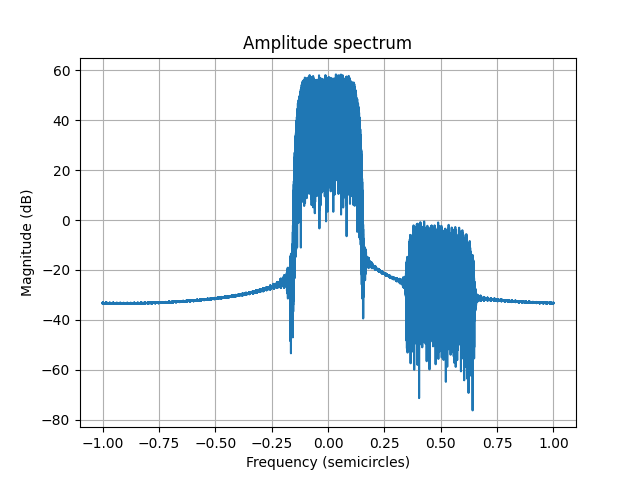

array([[-33.30657899],
       [-33.19189452],
       [-33.19965664],
       ...,
       [-33.26953957],
       [-33.21488775],
       [-33.1827954 ]])

In [115]:
  
# 1: Source signal
#plt.close()    
#file_path = "/home/xy/Documents/samples.pcm"
file_path = "/home/xy/cuda_filt_sig_int16.pcm" #Documents/linkstar_625kbaud_fs_1250kHz.pcm"
file_path = "qpsk_rc_int16_1_sig.bin"
#file_path = "qpsk_rrc_int16_after_py_rrc_fl32.bin"
# file_path = "qpsk_rrc_float.bin"
file_path = "/home/incredible/Projects/gpu/GPU_Overlap-and-save_convolution/GPU_OLS_C2C_sharedmemory/conv_signal.dat"
file_path = "qpsk_rrc_after_py_rrc_fl32.bin"
#file_path = "qpsk_rrc_float32.bin"

data_type = 'float32'
figure_counter = 0
source_samples = read_float_by_unpack_delimeter(file_path, data_type, 0, 0, '')
source_signal = make_cmplx_sig(source_samples)
print(source_signal[1031990:1031999])
#source_signal_full = read_signal(file_path, 'h', 20000)
plot_spectrum(source_signal, 0)

In [116]:
len(source_signal)

1032000

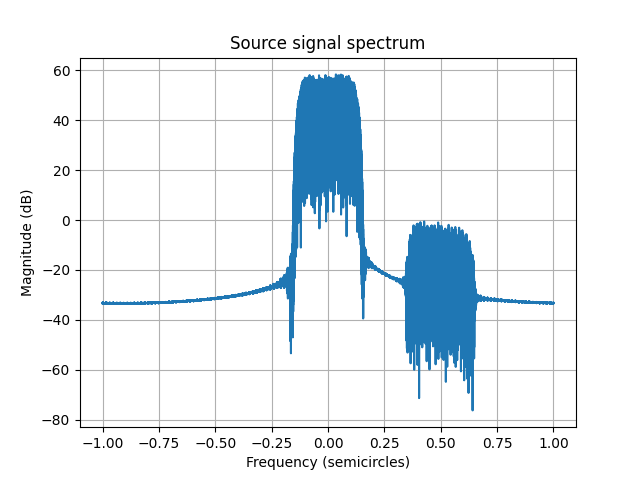

f_carr = 0


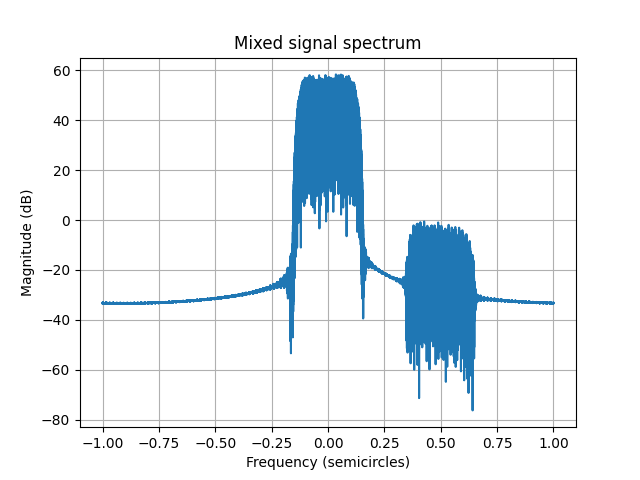

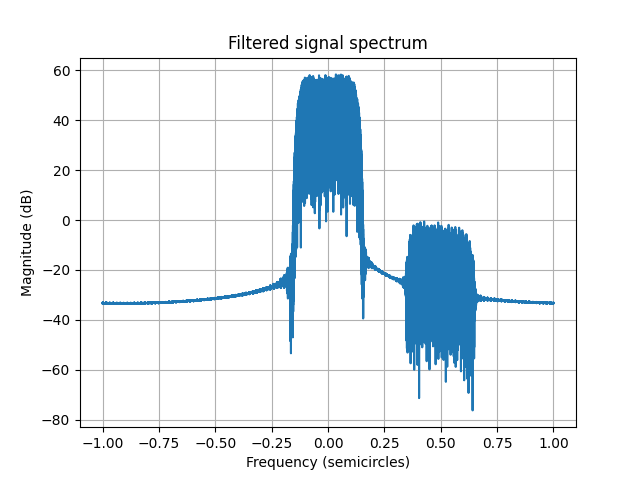

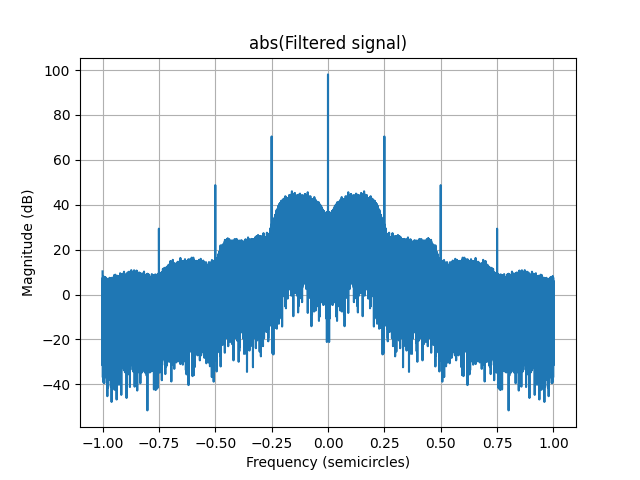

0.125
0.875
0.25
0.75
0.0800358527131783
Symbol rate:  0.12500 * F_s


In [117]:
#source_signal = source_signal_full[int(2.0e7):int(2.1e7):]
#source_signal = source_signal_full[:1000]#int(2.0e7 + 303500):int(2.0e7 + 304000):]

#MAX_SIG_LEN = 250000
#if len(source_signal) > MAX_SIG_LEN:
#    source_signal = np.resize(source_signal, (MAX_SIG_LEN,))
plot_spectrum(source_signal, 31, "Source signal spectrum")

# 2: Mixing signal
source_spectrum = calculate_spectrum(source_signal)
SIG_MIN_LVL = 60
#f_carr = find_carr_freq(source_spectrum, SIG_MIN_LVL)
f_carr = 0
print(f"f_carr = {f_carr}")
mixed_sig = mixing_signal(source_signal, f_carr)
plot_spectrum(mixed_sig, 32, "Mixed signal spectrum")

# 3: Filtering signal
NORMAL_CUTOFF = 0.17
#filt_sig = filter_signal(mixed_sig, NORMAL_CUTOFF)
filt_sig = mixed_sig 
plot_spectrum(filt_sig, 33, "Filtered signal spectrum")


# 4: Symbol rate
plot_spectrum(abs(filt_sig), 34, "abs(Filtered signal)")

fft_abs = calculate_spectrum(abs(filt_sig))
fft_abs[0] = 0
max_idx = np.argmax(fft_abs)
symbol_rate = max_idx / len(fft_abs)
print(max_idx/ len(fft_abs))
fft_abs[max_idx] = 0
max_idx = np.argmax(fft_abs)
print(max_idx/ len(fft_abs))
fft_abs[max_idx] = 0
max_idx = np.argmax(fft_abs)
print(max_idx/ len(fft_abs))
fft_abs[max_idx] = 0
max_idx = np.argmax(fft_abs)
print(max_idx/ len(fft_abs))
fft_abs[max_idx] = 0
max_idx = np.argmax(fft_abs)
print(max_idx/ len(fft_abs))
#plt.show()
print("Symbol rate: ", "{0:0.5f}".format(symbol_rate), "* F_s")

In [118]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
evens = [num for num in numbers if num % 2 == 0]
print(evens)

def calc_var(signal):
    m = np.mean(signal)
    var = (np.square(np.abs(signal - m)))
    #rms = np.square(np.mean(np.square(signal - m)))
    print(f"mean = {m}")#, var = {var}")
    print(var[:10])
    return np.sum((np.square(np.abs(signal - m))))

def calc_signal_rms(signal):
    quar1 = [num for num in signal if (num.real > 0) & (num.imag > 0)]
    quar2 = [num for num in signal if (num.real > 0) & (num.imag < 0)]
    quar3 = [num for num in signal if (num.real < 0) & (num.imag > 0)]
    quar4 = [num for num in signal if (num.real < 0) & (num.imag < 0)]
    
    print(quar1[:10])
    var1 = calc_var(quar1)
    var2 = calc_var(quar2)
    var3 = calc_var(quar3)
    var4 = calc_var(quar4)
    rms = np.sqrt((var1 + var2 + var3 + var4) / (len(quar1) + len(quar2) + len(quar3) + len(quar4)))
    print(f"rms = {rms}")


[2, 4, 6, 8, 10]


In [119]:
def plot_iq_pcm( delay: float, fsymb_to_fsampl: float, phase: float, f0: float):
    print(f"fract omega = {f0}, fsymb_to_fsampl = {fsymb_to_fsampl}, phase = {phase}")
    matplotlib.pyplot.close()
    #print(len(filt_sig))
    signal_iq = filt_sig[64:(1032192 -1000)]
    #print(signal_iq[0: 20])
    #print(f"AddFreq signal_iq len = {len(signal_iq)} \n")
    mixed_sig = add_freq(signal_iq, f0)
    #print(f"Mixed sig len = {len(mixed_sig)} ")
    #print(mixed_sig[(len(mixed_sig) - 1 - 20) : (len(mixed_sig) - 1)])
    #print(mixed_sig)
    sig_default = add_phase(mixed_sig, phase)

    p = 1
    q = round(fsymb_to_fsampl) #todo -> remove round()
    x0 = delay
    #print(f"p = {p}, q = {q}, x = {x0}")
    res_sig = resampling_lagrange_step_ver(sig_default, fsymb_to_fsampl, x0)
    #res_sig = resampling_lagrange(sig_default, p, q, x0)
    calc_signal_rms(res_sig)
    plt.close()
    fig = plt.figure()
    ax = fig.add_subplot()
    #print(res_sig)
    plt.plot(res_sig.real, res_sig.imag, '.')
    plt.grid()
    ax.set_aspect('equal', adjustable='box')
    plt.show()

delay_float = widgets.BoundedFloatText(
    value=0,
    min=-1,
    max=1,
    step=0.001,
    description='Delay before first symbol, samples:',
    disabled=False
)

sps = widgets.BoundedFloatText(
    value=1.0,
    min=1,
    max=50,
    step=0.00001,
    description='SPS',
    disabled=False
)

phase_float = widgets.BoundedFloatText(
    value=.0,
    min=-1,
    max=1,
    step=0.0001,
    description='Phase, [-1, 1], semicircles',
    disabled=False
)

f0_float = widgets.BoundedFloatText(
    value=.0,
    min = -1,
    max = 1,
    step = 0.00001,
    description = 'f0, [0, 1], circles',
    disabled = False
)

print(len(filt_sig))
interact(plot_iq_pcm, delay=delay_float, fsymb_to_fsampl=sps, phase = phase_float, f0 = f0_float)

1032000


interactive(children=(BoundedFloatText(value=0.0, description='Delay before first symbol, samples:', max=1.0, …

<function __main__.plot_iq_pcm(delay: float, fsymb_to_fsampl: float, phase: float, f0: float)>

In [120]:
224.67918395996094 # gpu fl32  225.2149200439453   223.12039184570312  225.49227905273438  225.05104064941406
225.39353942871094 # py  fl32  225.21466064453125  223.12010192871094  225.49209594726562  225.05079650878906
225.39353942871094 # py  fl64  225.21463012695312  223.12010192871094  225.4921112060547   225.05079650878906 

225.39353942871094

In [128]:
10 * math.log10(np.square(225.21466064453125) / np.square(225.21463012695312))

1.1769763689074037e-06

In [126]:
(1.1286232574447851e-05 + -6.465402206480388e-06 + -9.422661050582148e-06 + 1.118126906836094e-05) / 4

1.6448595964365638e-06

data num
2064000
<class 'numpy.float32'>
[[-50075.418]
 [-65652.8  ]
 [-79955.17 ]
 [-91209.29 ]
 [-97950.016]
 [-99044.23 ]
 [-93638.22 ]
 [-81596.46 ]
 [-63694.13 ]
 [-41263.58 ]]


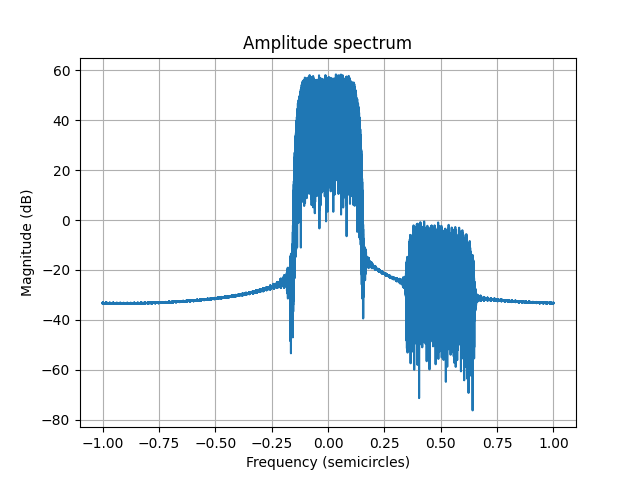

array([[-33.30657899],
       [-33.19189452],
       [-33.19965664],
       ...,
       [-33.26953957],
       [-33.21488775],
       [-33.1827954 ]])

In [121]:
file_path = "qpsk_rrc_after_py_rrc_fl32.bin"

data_type = 'float32'
figure_counter = 0
source_samples_py = read_float_by_unpack_delimeter(file_path, data_type, 0, 0, '')
source_signal_py = make_cmplx_sig(source_samples_py)
plot_spectrum(source_signal_py, 7)

In [98]:
diff = (source_signal_py - source_signal[:len(source_signal_py)])
#plot_signal_power(diff, 6)

print(source_signal[:10])
print(source_signal_py[:10])

[-50075.41796875+24708.359375j   -65652.796875  +22309.92382812j
 -79955.171875  +16652.16992188j -91209.2890625  +7959.62158203j
 -97950.015625   -3112.35522461j -99044.2265625 -15829.06445312j
 -93638.21875   -29237.35742188j -81596.4609375 -42115.75j
 -63694.12890625-53444.45703125j -41263.578125  -62581.08984375j]
[-50075.41796875+24708.359375j   -65652.796875  +22309.92382812j
 -79955.171875  +16652.16992188j -91209.2890625  +7959.62158203j
 -97950.015625   -3112.35522461j -99044.2265625 -15829.06445312j
 -93638.21875   -29237.35742188j -81596.4609375 -42115.75j
 -63694.12890625-53444.45703125j -41263.578125  -62581.08984375j]


In [99]:
10 * math.log10(np.square(224.977) / np.square(224.08684))

0.03443537848538776

In [100]:
10 * math.log10(np.square(223.12039184570312) / np.square(223.12010192871094)) # 224.0868377685547

1.1286232574447851e-05